In [1]:
import pandas as pd
import numpy as np
#실제 그래프를 그릴 수 있는 서브 함수
import matplotlib.pyplot as plt
import seaborn as sns

#경고표시 생략(일시적으로 생략하는게 좋음) 
import warnings
warnings.filterwarnings(action='ignore')

#한글폰트 지정 
import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font",family=font_name)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

# 머신러닝을 위한 모듈 
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
### 모두의 딥러닝 - 선형 회귀 보기

### 1. 단순 선형회귀 모델의 비용 구하기

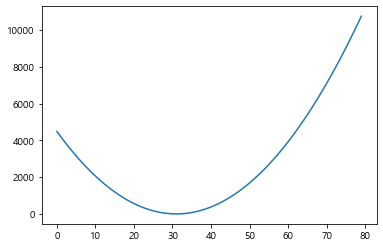

In [2]:
##### 데이터 준비 
x_train = [1,2,3] # 입력 데이터 
y_train = [1,2,3]
W =tf.placeholder(tf.float32)

##### 가설 준비 (y=Wx) --> W 의 값을 알아내기 단순해서 이미 알고있음 
hypot = W *x_train

##### 비용이 얼마나 들지 - 비용 공식  MSE 
cost = tf.reduce_mean(tf.square(hypot-y_train))

#  --------------------- 그래프 완성 ------------------------------#

sess = tf.Session()

cost_val=[]
for i in range(-30,50):
    result = sess.run(cost,feed_dict={W:i})
    cost_val.append(result)
    
plt.plot(cost_val)
sess.close() # w가 가장 작은 것을 구하는 경사하강법 

## 2. 경사 하강 알고리즘을 이용한  가중치 학습

In [3]:
##### 데이터 준비 
x_train = [1,2,3] # 입력 데이터 
y_train = [1,2,3]
W =tf.Variable(tf.random_normal([1]),dtype =tf.float32)
b =tf.Variable(tf.random_normal([1]),dtype =tf.float32)

##### 가설 준비 (y=Wx) --> W 의 값을 알아내기 단순해서 이미 알고있음 
hypot = W *x_train

##### 비용이 얼마나 들지 - 비용 공식  MSE 
cost = tf.reduce_mean(tf.square(hypot-y_train))

##### 최저 비용학습을 위한 경사하강 알고리즘(Gradient Descent)
gradient = tf.reduce_mean((hypot-y_train)*x_train)
learning_rate = 0.01 # 알파값 
descent = W -(learning_rate * gradient)
update=W.assign(descent)

#--------------- 그래프 완성 -----------------# 

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100): # 훈련 횟수 
    _, weight,c=sess.run([update,W,cost]) # 실험이 잘되고 있나 모니터링 하기 위해 
    print(step,weight,c)
    
sess.close()




0 [0.8038976] 0.1974618
1 [0.8130491] 0.179462
2 [0.82177347] 0.16310303
3 [0.8300907] 0.14823528
4 [0.8380198] 0.13472281
5 [0.84557885] 0.122442104
6 [0.85278517] 0.11128085
7 [0.8596552] 0.101136945
8 [0.8662046] 0.09191773
9 [0.8724484] 0.08353899
10 [0.8784008] 0.07592395
11 [0.8840754] 0.06900304
12 [0.88948524] 0.06271306
13 [0.8946426] 0.056996416
14 [0.89955926] 0.05180086
15 [0.9042465] 0.047078934
16 [0.908715] 0.04278742
17 [0.91297495] 0.0388871
18 [0.9170361] 0.03534232
19 [0.92090774] 0.032120686
20 [0.9245987] 0.029192736
21 [0.9281174] 0.026531667
22 [0.93147194] 0.024113158
23 [0.9346699] 0.021915091
24 [0.93771863] 0.019917436
25 [0.9406251] 0.018101854
26 [0.9433959] 0.016451797
27 [0.9460374] 0.014952098
28 [0.94855565] 0.013589137
29 [0.9509564] 0.01235044
30 [0.9532451] 0.011224608
31 [0.955427] 0.010201435
32 [0.9575071] 0.009271509
33 [0.95949006] 0.008426365
34 [0.96138054] 0.0076582576
35 [0.9631828] 0.006960154
36 [0.964901] 0.0063257017
37 [0.9665389] 0.0

In [4]:
##### 데이터 준비 
x_train = tf.placeholder(tf.float32,shape=[None]) # 값을 모를때
y_train = tf.placeholder(tf.float32,shape=[None]) 
W =tf.Variable(tf.random_normal([1]),dtype =tf.float32)
b =tf.Variable(tf.random_normal([1]),dtype =tf.float32)

##### 가설 준비 (y=Wx) --> W 의 값을 알아내기 단순해서 이미 알고있음 
hypot = W *x_train

##### 비용이 얼마나 들지 - 비용 공식  MSE 
cost = tf.reduce_mean(tf.square(hypot-y_train))

##### 최저 비용학습을 위한 경사하강 알고리즘(Gradient Descent)
gradient = tf.reduce_mean((hypot-y_train)*x_train)
learning_rate = 0.01 # 알파값 
descent = W -(learning_rate * gradient)
update=W.assign(descent)

#--------------- 그래프 완성 -----------------# 

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100): # 훈련 횟수 ,데이터 가져오기(데이터 갯수가 늘어나면 shape를 바꿔줘야함 매번 그러면 불편하지 않나?None으로 하면 댐)
    _, weight,c=sess.run([update,W,cost],feed_dict={x_train:[1,2,3,4,5,6,7],y_train:[1,2,3,4,5,6,7]}) # 실험이 잘되고 있나 모니터링 하기 위해 
    print(step,weight,c)
    
sess.close()


0 [0.01576622] 30.272379
1 [0.21261297] 19.374323
2 [0.37009037] 12.399567
3 [0.4960723] 7.9357233
4 [0.59685785] 5.0788627
5 [0.6774863] 3.2504718
6 [0.741989] 2.080302
7 [0.7935912] 1.3313935
8 [0.83487296] 0.8520918
9 [0.86789834] 0.5453388
10 [0.8943187] 0.349017
11 [0.915455] 0.22337069
12 [0.932364] 0.14295714
13 [0.9458912] 0.0914926
14 [0.95671296] 0.05855525
15 [0.96537036] 0.037475348
16 [0.9722963] 0.023984237
17 [0.977837] 0.015349885
18 [0.98226964] 0.009823962
19 [0.9858157] 0.0062873205
20 [0.9886526] 0.0040238826
21 [0.9909221] 0.0025752822
22 [0.99273765] 0.0016481625
23 [0.9941901] 0.0010548384
24 [0.9953521] 0.0006751028
25 [0.9962817] 0.00043206234
26 [0.9970254] 0.00027651523
27 [0.9976203] 0.00017697013
28 [0.9980962] 0.00011326047
29 [0.998477] 7.2487244e-05
30 [0.99878156] 4.639167e-05
31 [0.9990252] 2.9692537e-05
32 [0.9992202] 1.9004265e-05
33 [0.9993762] 1.2162143e-05
34 [0.99950093] 7.783444e-06
35 [0.99960077] 4.9813175e-06
36 [0.99968064] 3.1879536e-06
37 

In [5]:
##### 데이터 준비 
x_train = tf.placeholder(tf.float32,shape=[None]) # 값을 모를때
y_train = tf.placeholder(tf.float32,shape=[None]) 
W =tf.Variable(tf.random_normal([1]),dtype =tf.float32)
b =tf.Variable(tf.random_normal([1]),dtype =tf.float32)

##### 가설 준비 (y=Wx) --> W 의 값을 알아내기 단순해서 이미 알고있음 
hypot = W *x_train

##### 비용이 얼마나 들지 - 비용 공식  MSE 
cost = tf.reduce_mean(tf.square(hypot-y_train))

##### 최저 비용학습을 위한 경사하강 알고리즘(Gradient Descent)
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#--------------- 그래프 완성 -----------------# 

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100): # 훈련 횟수 ,데이터 가져오기(데이터 갯수가 늘어나면 shape를 바꿔줘야함 매번 그러면 불편하지 않나?None으로 하면 댐)
    _, weight,c,bias=sess.run([update,W,cost,b],feed_dict={x_train:[1,2,3,4,5],y_train:[2.1,3.1,4.1,5.1,6.1]}) # 실험이 잘되고 있나 모니터링 하기 위해 
    print(step,weight,c,bias)
    
# sess.close()



0 [0.96805334] 2.212232 [0.50369763]
1 [1.0410815] 1.4320743 [0.50369763]
2 [1.0980436] 0.95742625 [0.50369763]
3 [1.1424739] 0.66865027 [0.50369763]
4 [1.1771296] 0.49295893 [0.50369763]
5 [1.204161] 0.3860683 [0.50369763]
6 [1.2252456] 0.32103604 [0.50369763]
7 [1.2416916] 0.28147036 [0.50369763]
8 [1.2545195] 0.2573985 [0.50369763]
9 [1.2645252] 0.24275322 [0.50369763]
10 [1.2723296] 0.23384306 [0.50369763]
11 [1.2784171] 0.22842209 [0.50369763]
12 [1.2831653] 0.22512397 [0.50369763]
13 [1.2868689] 0.22311744 [0.50369763]
14 [1.2897577] 0.22189665 [0.50369763]
15 [1.292011] 0.2211539 [0.50369763]
16 [1.2937686] 0.22070205 [0.50369763]
17 [1.2951396] 0.22042713 [0.50369763]
18 [1.2962089] 0.22025982 [0.50369763]
19 [1.2970428] 0.22015806 [0.50369763]
20 [1.2976934] 0.22009616 [0.50369763]
21 [1.2982008] 0.22005847 [0.50369763]
22 [1.2985966] 0.22003555 [0.50369763]
23 [1.2989054] 0.22002158 [0.50369763]
24 [1.2991462] 0.22001314 [0.50369763]
25 [1.299334] 0.22000799 [0.50369763]
26 

In [6]:
#### Testing

sess.run(hypot,feed_dict={x_train:[27]})
sess.run(hypot,feed_dict={x_train:[2.5,3.7]})

array([3.2499993, 4.809999 ], dtype=float32)

In [7]:
sess.close()

In [8]:
##### 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx + b)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot-y_train))

##### 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
gradient = tf.reduce_mean((hypot-y_train) * x_train)
learning_rate = 0.01
descent = W - (learning_rate * gradient)
update = W.assign(descent)

# -------------------------- 그래프 완성 ---------------------------- #

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(50):
    _, weight, c = sess.run([update, W, cost], feed_dict={x_train:[1, 2, 3, 4, 5, 6, 7], 
                                                          y_train:[1, 2, 3, 4, 5, 6, 7]})
    print(step, weight, c)
    
sess.close()

0 [-1.3355459] 151.79109
1 [-0.8948865] 97.17778
2 [-0.5423591] 62.225254
3 [-0.26033714] 39.855644
4 [-0.03471957] 25.539097
5 [0.1457745] 16.376505
6 [0.29016978] 10.5124445
7 [0.40568596] 6.759446
8 [0.4980989] 4.3575273
9 [0.5720293] 2.8202996
10 [0.6311736] 1.8364736
11 [0.678489] 1.2068247
12 [0.7163414] 0.8038499
13 [0.7466233] 0.54594576
14 [0.77084875] 0.38088682
15 [0.79022914] 0.2752495
16 [0.8057335] 0.20764153
17 [0.818137] 0.16437225
18 [0.82805973] 0.13667993
19 [0.83599794] 0.118956886
20 [0.8423485] 0.10761421
21 [0.847429] 0.10035484
22 [0.85149336] 0.0957088
23 [0.85474485] 0.092735395
24 [0.85734606] 0.0908324
25 [0.85942703] 0.08961447
26 [0.8610918] 0.08883498
27 [0.8624236] 0.08833611
28 [0.86348903] 0.08801685
29 [0.8643414] 0.08781254
30 [0.86502326] 0.08768175
31 [0.86556876] 0.08759805
32 [0.8660052] 0.08754449
33 [0.8663543] 0.08751021
34 [0.8666336] 0.08748829
35 [0.86685705] 0.087474234
36 [0.8670358] 0.08746527
37 [0.8671788] 0.0874595
38 [0.8672932] 0.08

In [9]:
##### 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx + b)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot-y_train))

##### 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# -------------------------- 그래프 완성 ---------------------------- #

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    _, weight, c, bias = sess.run([update, W, cost, b], feed_dict={x_train:[1, 2, 3, 4, 5], 
                                                          y_train:[2.1, 3.1, 4.1, 5.1, 6.1]})
    print(step, weight, c, bias)

0 [-0.13416949] 51.426502 [-0.7461513]
1 [0.22611687] 30.121113 [-0.64117813]
2 [0.50084186] 17.704357 [-0.55992156]
3 [0.7102519] 10.467466 [-0.49677366]
4 [0.86980295] 6.249152 [-0.44745332]
5 [0.9912935] 3.7899182 [-0.40869242]
6 [1.0837305] 2.3557987 [-0.37799618]
7 [1.1539896] 1.5190712 [-0.35346007]
8 [1.2073195] 1.0304806 [-0.33363023]
9 [1.247727] 0.7447736 [-0.3173968]
10 [1.2782708] 0.577304 [-0.3039125]
11 [1.301286] 0.47874397 [-0.2925305]
12 [1.3185549] 0.4203473 [-0.28275704]
13 [1.3314382] 0.3853623 [-0.2742152]
14 [1.3409747] 0.36402696 [-0.26661718]
15 [1.3479573] 0.35065237 [-0.25974333]
16 [1.3529912] 0.34192327 [-0.2534259]
17 [1.3565387] 0.3359076 [-0.24753685]
18 [1.3589524] 0.33147973 [-0.24197844]
19 [1.3605015] 0.32798284 [-0.23667601]
20 [1.3613918] 0.32503498 [-0.23157258]
21 [1.3617799] 0.32241347 [-0.22662464]
22 [1.3617858] 0.31998786 [-0.22179894]
23 [1.3615009] 0.31768247 [-0.21707012]
24 [1.3609948] 0.31545335 [-0.21241876]
25 [1.360321] 0.31327465 [-0.

In [10]:
##### Testing

print(sess.run(hypot, feed_dict={x_train:[27]}))
print(sess.run(hypot, feed_dict={x_train:[2.5, 3.7]}))

[34.692116]
[3.2870696 4.825276 ]


In [11]:
sess.close()

### (3) 응용 예제

+ 아래의 데이터를 가지고 하루 8시간을 일할 때 매출액이 얼마인지 예측하시오

In [12]:
##### 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx + b)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot-y_train))

##### 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# -------------------------- 그래프 완성 ---------------------------- #

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2000):
    _, c = sess.run([update, cost], feed_dict={x_train:[1, 2, 3, 4, 5,6,7], 
                                                          y_train:[25000, 55000, 75000, 110000, 128000, 155000, 180000]})
    if step % 100 ==0:
        print(step, c)

0 13454005000.0
100 9833571.0
200 9188455.0
300 8889887.0
400 8751707.0
500 8687753.0
600 8658150.0
700 8644457.0
800 8638115.0
900 8635187.0
1000 8633825.0
1100 8633197.0
1200 8632903.0
1300 8632773.0
1400 8632708.0
1500 8632673.0
1600 8632661.0
1700 8632662.0
1800 8632654.0
1900 8632652.0


In [13]:
#### Testing

print(sess.run(hypot, feed_dict={x_train:[8]}))

[206570.42]


In [14]:
sess.close()

## 2. 다중 선형회귀 모델 

In [15]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

### (1) 단순하게 처리하는 경우

In [16]:
X1 = tf.placeholder(tf.float32,shape = [None])
X2 = tf.placeholder(tf.float32,shape = [None])
X3 = tf.placeholder(tf.float32,shape = [None])

y = tf.placeholder(tf.float32,shape = [None])

##### 가설 설정 : y = W1*X1+W2*X2+W3*X3+b
W1 = tf.Variable(tf.random_normal([1])) # 초기값이 정규분포를 이루는 랜덤값
W2 = tf.Variable(tf.random_normal([1]))
W3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hypot = W1*X1+W2*X2+W3*X3+b

##### 비용계산 --> 선형회귀니까 평균제곱 오차 MSE
cost=tf.reduce_mean(tf.square(hypot-y))

##### 최소비용계산 
train=tf.train.GradientDescentOptimizer(learning_rate=0.00001)
train=train.minimize(cost)


In [17]:
sess =tf.Session()
sess.run(tf.global_variables_initializer())

# 훈련횟수
for step in range(10000):
    _,c,h=sess.run([train,cost,hypot],feed_dict={X1:x1_data,X2:x2_data,X3:x3_data,y:y_data})
    if step % 500 ==0:
           print(step, c,h)
    
    

0 12798.07 [250.8771  305.36432 298.66605 330.14197 229.46657]
500 8.563263 [150.3663  184.8799  179.78847 200.63739 137.68922]
1000 8.172247 [150.22379 184.98415 179.75314 200.5471  137.88066]
1500 7.8358865 [150.10274 185.07358 179.72426 200.46227 138.05202]
2000 7.5421934 [150.0004  185.15015 179.70105 200.38232 138.20581]
2500 7.2818594 [149.9143  185.21547 179.68271 200.30664 138.3442 ]
3000 7.047905 [149.84239 185.27097 179.66858 200.23479 138.46906]
3500 6.8348336 [149.78288 185.31796 179.65822 200.1664  138.58214]
4000 6.638611 [149.73407 185.35751 179.65099 200.10103 138.6848 ]
4500 6.4559507 [149.69461 185.39055 179.64655 200.03836 138.77834]
5000 6.2845116 [149.66328 185.41798 179.64452 199.97821 138.8639 ]
5500 6.1223745 [149.63896 185.44048 179.64449 199.9202  138.94238]
6000 5.9680266 [149.62085 185.45876 179.64633 199.86424 139.01472]
6500 5.820409 [149.608   185.47325 179.64969 199.81003 139.08154]
7000 5.6786118 [149.59976 185.48456 179.65436 199.75748 139.1436 ]
7500 

In [18]:
sess.close()

### (2) Matrix로 처리

In [19]:
"""
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]
을 

x1_data = [[73., 93., 89., 96., 73.],
            [80., 88., 91., 98., 66.],
            [75., 93., 90., 100., 70.]]
y_data = [152., 185., 180., 196., 142.]

"""

'\nx1_data = [73., 93., 89., 96., 73.]\nx2_data = [80., 88., 91., 98., 66.]\nx3_data = [75., 93., 90., 100., 70.]\ny_data = [152., 185., 180., 196., 142.]\n을 \n\nx1_data = [[73., 93., 89., 96., 73.],\n            [80., 88., 91., 98., 66.],\n            [75., 93., 90., 100., 70.]]\ny_data = [152., 185., 180., 196., 142.]\n\n'

#### 1차원을 2차원으로 묶기


In [21]:
x1_data = [73.,93.,89.,96.,73.]
x2_data = [80.,88.,91.,98.,66.]
x3_data = [75.,93.,90.,100.,70.]
y_data = [152.,185.,180.,196.,142.]

x_data = np.array([x1_data,x2_data,x3_data])
y_data = np.array([y_data])

print(x_data)
print(y_data)


[[ 73.  93.  89.  96.  73.]
 [ 80.  88.  91.  98.  66.]
 [ 75.  93.  90. 100.  70.]]
[[152. 185. 180. 196. 142.]]


In [22]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 96., 142.]

x_data = np.dstack([x1_data, x2_data, x3_data])
print(x_data)

y_data = np.array([y_data]).reshape((-1,1))
print(y_data)


[[[ 73.  80.  75.]
  [ 93.  88.  93.]
  [ 89.  91.  90.]
  [ 96.  98. 100.]
  [ 73.  66.  70.]]]
[[152.]
 [185.]
 [180.]
 [ 96.]
 [142.]]


In [23]:
pd.DataFrame(zip(x1_data,x2_data,x3_data)).values

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.]])

In [24]:
np.reshape([x1_data,x2_data,x3_data],(3,5)).T

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.]])

In [25]:
sess=tf.Session()
tf.stack([x1_data,x2_data,x3_data],axis=1).eval(session=sess)

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.]], dtype=float32)

In [26]:
x_data = [[73., 80., 75.], [93., 88., 93.],
         [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]
X = tf.placeholder(tf.float32,shape = [5,3]) # [5,3] 5는 데이터 갯수, 3은 변수 갯수
y = tf.placeholder(tf.float32,shape = [5,1])

##### 가설 설정 : y = W1*X1+W2*X2+W3*X3+b
W1 = tf.Variable(tf.random_normal([1])) # 초기값이 정규분포를 이루는 랜덤값
W2 = tf.Variable(tf.random_normal([1]))
W3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hypot = W1*X1+W2*X2+W3*X3+b

##### 비용계산 --> 선형회귀니까 평균제곱 오차 MSE
cost=tf.reduce_mean(tf.square(hypot-y))

##### 최소비용계산 
train=tf.train.GradientDescentOptimizer(learning_rate=0.00001)
train=train.minimize(cost)

In [27]:
X = tf.placeholder(tf.float32,shape = [None,3]) # 데이터 갯수는 몇개가 될지 모르니 None이라 하자 
y = tf.placeholder(tf.float32,shape = [None,1])

##### 가설 설정 : y = W1*X1+W2*X2+W3*X3+b
W = tf.Variable(tf.random_normal([3,1])) # 초기값이 정규분포를 이루는 랜덤값
b = tf.Variable(tf.random_normal([1]))

hypot = tf.matmul(X,W)+b

##### 비용계산 --> 선형회귀니까 평균제곱 오차 MSE
cost=tf.reduce_mean(tf.square(hypot-y))

##### 최소비용계산 
train=tf.train.GradientDescentOptimizer(learning_rate=0.00001)
train=train.minimize(cost)

In [28]:
sess =tf.Session()
sess.run(tf.global_variables_initializer())

# 훈련횟수
for step in range(10000):
    _,c,h=sess.run([train,cost,hypot],feed_dict={X:x_data,y:y_data})
    if step % 500 ==0:
           print(step, c,h)
    

0 43227.727 [[-33.352398]
 [-36.747314]
 [-37.93627 ]
 [-42.59735 ]
 [-25.88783 ]]
500 0.5308458 [[151.22585]
 [184.9155 ]
 [180.56812]
 [195.3472 ]
 [143.13968]]
1000 0.46978045 [[151.31122]
 [184.85605]
 [180.59308]
 [195.37447]
 [143.05391]]
1500 0.42245468 [[151.38528]
 [184.80435]
 [180.61458]
 [195.39911]
 [142.97844]]
2000 0.38561004 [[151.44948]
 [184.75941]
 [180.63307]
 [195.42146]
 [142.91193]]
2500 0.35677308 [[151.50508]
 [184.72044]
 [180.64897]
 [195.44185]
 [142.85327]]
3000 0.33407563 [[151.55315]
 [184.68657]
 [180.66257]
 [195.46045]
 [142.80147]]
3500 0.3160634 [[151.5947 ]
 [184.65723]
 [180.67415]
 [195.47748]
 [142.75568]]
4000 0.30165368 [[151.63052]
 [184.63179]
 [180.68402]
 [195.49315]
 [142.71512]]
4500 0.28999415 [[151.66138]
 [184.60982]
 [180.69238]
 [195.50766]
 [142.67917]]
5000 0.28044817 [[151.68785]
 [184.5908 ]
 [180.69939]
 [195.52107]
 [142.64719]]
5500 0.27254826 [[151.71056]
 [184.57442]
 [180.70529]
 [195.53358]
 [142.61876]]
6000 0.26589522 [[

## 3. 대용량 데이터 처리

### (1) DASK 

+ 가상의 데이터 프레임
+ 병렬처리용 작업 스케줄러 
+ 파이썬에서 제공하는 

In [29]:
%%writefile 'data/sample1.csv'
c1, c2, c3
1, 1.11, one
2, 2.11, two
3, 3.11, three
4, 4.11, four
5, 5.11, five
6, 6.11, six


Overwriting data/sample1.csv


In [30]:
df1 = pd.read_csv('data/sample1.csv')
df1
df1[' c2'].mean()

3.61

In [2]:
import dask.dataframe as dd

In [32]:
df2 = dd.read_csv('data/sample1.csv')
df2 # 실제 데이터를 불러온게 아니라 형태만 가져옴, 가상의 데이터 프레임 


,c1,c2,c3
npartitions=1,,,
,int64,float64,object
,...,...,...


In [33]:
df2.head() # head()와 같은 연산자 일 때 연산자에 필요한 데이터만 가져옴 
# 이렇게 해서 빠르고, 대량의 데이터도 처리할 수 있음. 
# 판다스에서 썼던 함수나 메소드를 그대로 쓸 수 있음. 

,c1,c2,c3
0,1,1.11,one
1,2,2.11,two
2,3,3.11,three
3,4,4.11,four
4,5,5.11,five


In [34]:
df2[' c2'].mean().compute() # compute()를 써야 계산이 됨 

3.61

In [35]:
df2[' c2']= 100
df2.head()

df2[' c4'] = 200
df2.head()

,c1,c2,c3,c4
0,1,100,one,200
1,2,100,two,200
2,3,100,three,200
3,4,100,four,200
4,5,100,five,200


In [36]:
df2

,c1,c2,c3,c4
npartitions=1,,,,
,int64,int64,object,int64
,...,...,...,...


In [37]:
df3=dd.read_csv('data/crime.csv',dtype=str,error_bad_lines=False,warn_bad_lines=False)
df3 # 1.7기가짜리 파일인데 형태만 가져오는 거라 금방 끝남. 

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
npartitions=29,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [38]:
df3.head()
df3.tail()
df3.count().compute()

ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [39]:
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register() # 오래 걸리는 작업 같은 경우 얼마나 걸리는지 표시해줌. 

In [76]:
%%time
df3.count().compute()

[########################################] | 100% Completed | 49.2s
Wall time: 49.2 s


ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [47]:
# 병렬처리로 했을 때 살펴보기 

df3.count().compute(scheduler="processes",num_workers=8)


[########################################] | 100% Completed | 34.7s


ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [40]:
%%writefile 'data/sample2.csv'
c1, c2, c3
7, 7.7, seven
8, 8.7, eight
9, 9.7, nine

Overwriting data/sample2.csv


In [41]:
df4=dd.read_csv('data/sample*.csv')

In [42]:
df4.count().compute()

[########################################] | 100% Completed |  0.1s


c1     9
 c2    9
 c3    9
dtype: int64

In [43]:
### 한쪽 막아 놓고 쓰는 것은 stack이고 막지 않는 것은 Queue 사용 
# 비벤트 처리할때 queue사용
# queue는 메모리 저장하는 - 임시데이터를 저장하는 용도 

### (2) Queue Runners

#### 1) enqueue_many & dequeue

In [44]:
# queue의 길리와 저장될 데이터 형식 
q=tf.FIFOQueue(20,'float') # 큐를 저장할 

enc_ops = q.enqueue_many(([1.0,2.0,3.0,4.0],))
qr=tf.train.QueueRunner(q,[enc_ops]*3) # 같은 데이터 3개를 동시에 입력하겠다는 뜻. 
# 비동기
sess =tf.Session()
coordi=tf.train.Coordinator()
threads=qr.create_threads(sess,coord=coordi,start=True)# 현재 작업이 끝나지 않아도 다른 작업을 할 수 있게
for step in range(20):
    print(sess.run(q.dequeue()))
coordi.request_stop()
coordi.join(threads)
sess.close()


Instructions for updating:
To construct input pipelines, use the `tf.data` module.
1.0
2.0
3.0
4.0
1.0
2.0
3.0
4.0
1.0
2.0
3.0
4.0
1.0
2.0
3.0
4.0
1.0
2.0
3.0
4.0


In [45]:
# queue의 길리와 저장될 데이터 형식 
q=tf.FIFOQueue(20,'float') # 큐를 저장할 

enc_ops1 = q.enqueue_many(([1.0, 2.0, 3.0],))
enc_ops2 = q.enqueue_many(([4.0, 5.0, 6.0],))
enc_ops3 = q.enqueue_many(([7.0, 8.0, 9.0],))
qr=tf.train.QueueRunner(q,[enc_ops1,enc_ops2,enc_ops3]) # 같은 데이터 3개를 동시에 입력하겠다는 뜻. 
# 비동기
sess =tf.Session()
coordi=tf.train.Coordinator()
threads=qr.create_threads(sess,coord=coordi,start=True)# 현재 작업이 끝나지 않아도 다른 작업을 할 수 있게
for step in range(20):
    print(sess.run(q.dequeue()))
coordi.request_stop()
coordi.join(threads)
sess.close()

1.0
2.0
3.0
7.0
8.0
9.0
7.0
8.0
9.0
1.0
2.0
3.0
4.0
5.0
6.0
4.0
5.0
6.0
1.0
2.0


### # 2) decodoing

In [46]:
filename_queue=tf.train.string_input_producer(['[data/sample1.csb]','data/sample2.csv'],shuffle=False,
                              name = 'filename_queue')
reader = tf.TextLineReader()
key,value=reader.read(filename_queue)
a1,a2,a3=tf.decode_csv(value,record_defaults=[[0],[0.0],['null']],field_delim=',')

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TextLineDataset`.



In [ ]:
sess=tf.Session()
coordi=tf.train.Coordinator()
threads=tf.train.start_queue_runners(sess=sess,coord=coordi)

for i in range(30):
    print(sess.run([a1,a2,a3]))
    
coordi.request_stop()
coordi.join(threads)
sess.close()

Instructions for updating:
To construct input pipelines, use the `tf.data` module.


#### 3) lab 슬라이드 코드

In [ ]:
filename_queue = tf.train.string_input_producer(
   ['data-01-test-score.csv', 'data-02-test-score.csv', ... ], 
   shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key,value=reader.read(filename_queue)
a1,a2,a3=tf.decode_csv(value,record_defaults=[[0],[0.0],['null']],field_delim=',')


## 4. Batch

In [ ]:
"""
1. Full Batch or Batch : 전체 데이터를 의미 - 덩어리를 나누지 않고 전체 덩어리로 훈련 
    - 샘플 전체를 계산하므로 시간이 많이 걸린다.
    - 데이터가 많을 경우(한번에 데이터를 메모리에 로드하지 못할 경우) 사용이 불가
    - 오차율이 적다
    
2. Stochastic Gradient Descent : 한개의 데이터를 확률로
    - 데이터를 한개씩 추출해서 처리해보고 이를 모든 데이터에 반복을 돌린다. 
    - 오차율이 클 수 있다. 
    - 속도가 엄청나게 느리다. 
    - 하드웨어 성능을 제대로 발휘할 수 없다(특히 GPU).

3. Mini Batch
    - 전체 훈련데이터를 배치 사이즈로 등분하여 각 배치셋을 순차적으로 수행
    - Full Batch 보다 빠르고 SGD보다 오차율도 낮다. 

4. Epoch(or Interation) : 배치의 수행 횟수

"""

In [18]:
filename_queue = tf.train.string_input_producer(
   ['data-01-test-score.csv'],shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key,value=reader.read(filename_queue)
record_defaults=[[0.],[0.],[0,],[0,]]
xy= tf.decode_csv(value, record_defaults=record_defaults)                       
xy                       

[<tf.Tensor 'DecodeCSV_4:0' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV_4:1' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV_4:2' shape=() dtype=int32>,
 <tf.Tensor 'DecodeCSV_4:3' shape=() dtype=int32>]

In [17]:
train_x_batch,train_y_batch = tf.train.batch([xy[0:-1],xy[-1:]],batch_size=10)

In [16]:
# 모델 만들기 
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)


In [20]:
import tensorflow as tf
filename_queue = tf.train.string_input_producer(
   ['data-01-test-score.csv'], shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

# Default values, in case of empty columns. Also specifies the type of the
# decoded result.
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

# collect batches of csv in
train_x_batch, train_y_batch = \
   tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)


In [ ]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Start populating the filename queue.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)#병렬 처리

for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_batch, Y: y_batch})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

coord.request_stop()
coord.join(threads)

# Ask my score
print("Your score will be ",
      sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))





Instructions for updating:
To construct input pipelines, use the `tf.data` module.


## 5. 로지스틱 회귀
+ 연속변수 값을 처리해서 명목변수로 변환(직선읜 방정식을 시그모이드로 바꿔주는)

In [2]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

In [11]:
X = tf.placeholder(tf.float32,shape=[None,2])
y = tf.placeholder(tf.float32,shape=[None,1])

W = tf.Variable(tf.random_normal([2,1])) # x,y 출력갯수
b = tf.Variable(tf.random_normal([1])) # 출력의 갯수

print('---------선형회귀랑 여기까진 같음-------------') 

# 가설
hypot = tf.sigmoid(tf.matmul(X,W)+b)

# 비용 - 오차값이 얼마인지
# y 값이 0일때 1일때를 합친 공식
cost = -tf.reduce_mean(y * tf.math.log(hypot) + (1 - y) * tf.math.log(1 - hypot)) 

# 최소비용 
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)







---------선형회귀랑 여기까진 같음-------------


In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(15000):
    _,h=sess.run([train,hypot],feed_dict={X:x_data,y:y_data})
    if step%200 ==0 :# 200 개의 1개씩 보여주기 
        print(step,h)
        
# 성능을 개선 하기 위해서는 learning_rate 를 조절하거나 학습의 수 조절


0 [[0.96424925]
 [0.97799337]
 [0.8611905 ]
 [0.95880514]
 [0.943958  ]
 [0.84261405]]
200 [[0.7818273 ]
 [0.7466065 ]
 [0.71693313]
 [0.672327  ]
 [0.6312994 ]
 [0.5918652 ]]
400 [[0.60848814]
 [0.5403636 ]
 [0.7603417 ]
 [0.61097944]
 [0.6447963 ]
 [0.7622442 ]]
600 [[0.4824707 ]
 [0.41211018]
 [0.7846861 ]
 [0.58990455]
 [0.673263  ]
 [0.8490159 ]]
800 [[0.39932755]
 [0.3393635 ]
 [0.79550385]
 [0.584131  ]
 [0.6990332 ]
 [0.89152837]]
1000 [[0.3429082]
 [0.2960997]
 [0.7979881]
 [0.5841319]
 [0.7196261]
 [0.9140317]]
1200 [[0.30269262]
 [0.26889297]
 [0.79520357]
 [0.5866147 ]
 [0.73596597]
 [0.9269719 ]]
1400 [[0.27264538]
 [0.25103608]
 [0.7888962 ]
 [0.5903363 ]
 [0.74924344]
 [0.9349224 ]]
1600 [[0.24924839]
 [0.23895393]
 [0.78011525]
 [0.594762  ]
 [0.7603759 ]
 [0.94006276]]
1800 [[0.23036745]
 [0.23059961]
 [0.76953906]
 [0.5996265 ]
 [0.7700029 ]
 [0.9435267 ]]
2000 [[0.21465658]
 [0.22472754]
 [0.75763834]
 [0.6047785 ]
 [0.7785588 ]
 [0.94594955]]
2200 [[0.20123704]
 [0.

In [18]:
# 예측값 # 0.5보다 크면 1 작으면 0
preds =tf.cast(hypot > 0.5,dtype=tf.float32)
sess.run(preds,feed_dict={X:x_data,y:y_data})

# 맞은 갯수 평균
accuracy=tf.reduce_mean(tf.cast(tf.equal(preds,y),dtype=tf.float32))
accuracy

<tf.Tensor 'Mean_4:0' shape=() dtype=float32>

In [19]:
# 측정결과 테스트
h,p,a=sess.run([hypot,preds,accuracy],feed_dict={X:x_data,y:y_data})
print(h)
print(p)
print(a)

[[0.01854796]
 [0.13803476]
 [0.2397451 ]
 [0.8129555 ]
 [0.9577041 ]
 [0.98639905]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
1.0


### (1) Softmax

In [29]:
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], 
                                                        [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]



In [31]:
X = tf.placeholder(tf.float32,shape=[None,4])
y = tf.placeholder(tf.float32,shape=[None,3])

W = tf.Variable(tf.random_normal([4,3])) # x,y 출력갯수
b = tf.Variable(tf.random_normal([3])) # 출력의 갯수

# 가설
hypot = tf.nn.softmax(tf.matmul(X,W)+b)

# 비용 - 오차값이 얼마인지
# y 값이 0일때 1일때를 합친 공식
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypot), axis=1)) 

# 최소비용 
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [33]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(5000):
    _,c=sess.run([train,cost],feed_dict={X:x_data,y:y_data})
    if step%100 ==0 :# 200 개의 1개씩 보여주기 
        print(step,c)
        

0 10.58654
100 2.219711
200 1.4197065
300 0.96451634
400 0.798724
500 0.7214823
600 0.67265105
700 0.6371629
800 0.6094035
900 0.5866956
1000 0.56755316
1100 0.55106086
1200 0.53661203
1300 0.523782
1400 0.5122622
1500 0.50182116
1600 0.49228138
1700 0.4835037
1800 0.47537738
1900 0.4678132
2000 0.46073806
2100 0.45409167
2200 0.4478234
2300 0.441891
2400 0.43625855
2500 0.4308951
2600 0.42577425
2700 0.42087305
2800 0.4161716
2900 0.4116524
3000 0.40730017
3100 0.40310147
3200 0.39904436
3300 0.39511797
3400 0.39131302
3500 0.38762105
3600 0.38403422
3700 0.38054597
3800 0.37714982
3900 0.37384042
4000 0.37061256
4100 0.36746162
4200 0.36438346
4300 0.36137402
4400 0.35842997
4500 0.35554802
4600 0.3527252
4700 0.34995872
4800 0.34724614
4900 0.34458503


In [39]:
##### argmax

a=tf.constant([3,10,1])
print(a.eval(session=sess))
print(tf.argmax(a,0).eval(session=sess))#제일 큰 값을 위치로 알려줌
# 0은 차원을 뜻함

b= tf.constant([[5,10,17],[4,50,6]])
print(tf.argmax(b,1).eval(session=sess))


[ 3 10  1]
1
[2 1]


In [41]:
preds=tf.argmax(hypot,1)
sess.run(preds,feed_dict={X:x_data,y:y_data})

array([2, 2, 2, 1, 1, 1, 0, 0], dtype=int64)

In [46]:
##### 실제값과 예측 
correct=tf.equal(preds,tf.argmax(y,1))
sess.run(correct,feed_dict={X:x_data,y:y_data})

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [47]:
##### 숫자로 바꿔줘야 평균을 내지 cast 
accuracy=tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
sess.run(accuracy,feed_dict={X:x_data,y:y_data})

1.0

In [51]:
##### 테스트 : [1,11,7,9] 이렇게 넣었을 때는 어떻게 나올까?
result=sess.run(hypot,feed_dict={X:[[1,11,7,9]]})
print(result)
print(sess.run(tf.argmax(result,1)))



[[4.5061147e-01 5.4918176e-01 2.0683487e-04]]
[1]


### (2)  softmax_cross_entropy_with_logits

In [54]:
X = tf.placeholder(tf.float32,shape=[None,4])
y = tf.placeholder(tf.float32,shape=[None,3])

W = tf.Variable(tf.random_normal([4,3])) # x,y 출력갯수
b = tf.Variable(tf.random_normal([3])) # 출력의 갯수

# 가설, 비용
logit = tf.matmul(X,W)+b
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,labels=y_data)

# 최소비용 
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# ---------------------------------------------------------

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(5000):
    _,c=sess.run([train,cost],feed_dict={X:x_data,y:y_data})
    if step%100 ==0 : 
        print(step,c)
        

result=sess.run(hypot,feed_dict={X:[[1,11,7,9]]})
print(result)
print(sess.run(tf.argmax(result,1)))

0 [2.5658305e+00 4.5316582e+00 4.6540642e+00 7.9669352e+00 7.8186140e+00
 1.0590739e+01 3.5046916e-05 3.8146900e-06]
100 [0.39999524 1.021636   0.37747097 0.71850955 1.124048   0.2711685
 0.53564274 0.3312847 ]
200 [0.17054056 0.63471234 0.41274354 0.60466725 0.9787975  0.26700518
 0.51256436 0.31461477]
300 [0.0946089  0.4574746  0.42882302 0.5289561  0.870832   0.27308375
 0.49512944 0.29428458]
400 [0.05943687 0.3607136  0.4271945  0.47567657 0.794368   0.2726567
 0.48006994 0.2745442 ]
500 [0.04019187 0.30138674 0.41564775 0.43479013 0.7358115  0.2682131
 0.4664836  0.2562589 ]
600 [0.02856016 0.26162338 0.3993936  0.40155056 0.6881525  0.26168507
 0.4538895  0.23945121]
700 [0.02104535 0.23305549 0.38137466 0.3735492  0.6477186  0.25416097
 0.44202074 0.22400415]
800 [0.01594964 0.21138339 0.363154   0.34942284 0.61246276 0.24623999
 0.4307215  0.20979188]
900 [0.01236381 0.19422641 0.34551895 0.3283162  0.5811511  0.23825459
 0.4199038  0.19670448]
1000 [0.00976465 0.18018198 0.3

### (3) 사례 1: 동물 분류

In [59]:
xy = np.loadtxt('data/data-04-zoo.csv',dtype=np.float32,delimiter=',')
print(xy.shape)

x_data = xy[:,0:-1]
y_data = xy[:,[-1]]
print(x_data.shape,y_data.shape)
print(y_data)

(101, 17)
(101, 16) (101, 1)
[[0.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [3.]
 [0.]
 [0.]
 [1.]
 [3.]
 [6.]
 [6.]
 [6.]
 [1.]
 [0.]
 [3.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [5.]
 [4.]
 [4.]
 [0.]
 [0.]
 [0.]
 [5.]
 [0.]
 [0.]
 [1.]
 [3.]
 [0.]
 [0.]
 [1.]
 [3.]
 [5.]
 [5.]
 [1.]
 [5.]
 [1.]
 [0.]
 [0.]
 [6.]
 [0.]
 [0.]
 [0.]
 [0.]
 [5.]
 [4.]
 [6.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [3.]
 [3.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [6.]
 [3.]
 [0.]
 [0.]
 [2.]
 [6.]
 [1.]
 [1.]
 [2.]
 [6.]
 [3.]
 [1.]
 [0.]
 [6.]
 [3.]
 [1.]
 [5.]
 [4.]
 [2.]
 [2.]
 [3.]
 [0.]
 [0.]
 [1.]
 [0.]
 [5.]
 [0.]
 [6.]
 [1.]]


In [74]:
# 위의 데이터는 원핫인코딩이고 이거는 아니기에 다를 수 밖에 없음(7가지 종류)
X = tf.placeholder(tf.float32,shape=[None,16])
y = tf.placeholder(tf.int32,shape=[None,1])

W = tf.Variable(tf.random_normal([16,7])) # 원핫 인코딩으로 바꾸고 계산해야함.
b = tf.Variable(tf.random_normal([7])) 

# 우선 y 를 OneHot Encoding으로 처리 해줘야 함 
y_one_hot = tf.one_hot(y,7)
# sess = tf.Session()
# print(sess.run(y_one_hot,feed_dict={y:y_data})) --> 1 차원이 됨 
y_one_hot = tf.reshape(y_one_hot,[-1,7])

# 가설, 비용
logit = tf.matmul(X,W)+b
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,labels=y_one_hot)

# 최소비용 
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [75]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(301):
    _,c=sess.run([train,tf.reduce_mean(cost)],feed_dict={X:x_data,y:y_data})
    if step%100 ==0 : 
        print(step,c)

0 11.270531
100 0.09620222
200 0.050705373
300 0.03464055


In [76]:
preds=tf.argmax(hypot,1)
correct=tf.equal(preds,tf.argmax(y_one_hot,1))
accuracy=tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
sess.run(accuracy,feed_dict={X:x_data,y:y_data})

1.0

### (4) 사례 2: MNIST 이미지 데이터셋 

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [42]:
# 데이터를 자동으로 준비해주고, 원핫인코딩까지 해주는 
mnist=input_data.read_data_sets('data/mnist/',one_hot=True)
mnist

Extracting data/mnist/train-images-idx3-ubyte.gz
Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000018D54306188>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000018D54311088>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000018D5433D588>)

In [84]:
# 데이터 확인해보기
print(type(mnist))
print(mnist.train.labels)
print(mnist.train.num_examples)
print(mnist.test.num_examples)
print(mnist.train.images[0].shape)

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
55000
10000
(784,)


In [43]:
X = tf.placeholder(tf.float32,shape=[None,28*28])
y = tf.placeholder(tf.int32,shape=[None,10])

W = tf.Variable(tf.random_normal([28*28,10])) # 원핫 인코딩으로 바꾸고 계산해야함.
b = tf.Variable(tf.random_normal([10])) 

# 가설, 비용
logit = tf.matmul(X,W)+b
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,labels=y)

# 최소비용 
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

In [94]:
##### Full Batch
sess = tf.Session()
sess.run(tf.global_variables_initializer())


for step in range(401):
    _,c=sess.run([train,tf.reduce_mean(cost)],feed_dict={X:mnist.train.images,
                                                         y:mnist.train.labels})
    if step%100 ==0 : 
        print(step,c)

0 17.310568
100 1.1769103
200 1.0171628
300 0.5031558
400 0.47784323


In [92]:
preds=tf.argmax(hypot,1)
correct=tf.equal(preds,tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
sess.run(accuracy,feed_dict={X:mnist.train.images,
                             y:mnist.train.labels})

0.9197091

In [44]:
##### mini batch

sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 10
batch_size = 100

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, tf.reduce_mean(cost)], 
                        feed_dict={X:batch_x, y:batch_y})
        
        avg_cost += c / total_batch
        
    print(i, avg_cost)

549 2.9502943005345084
549 1.0598113960569562
549 0.8437259337035096
549 0.7384440154649997
549 0.6719676132364708
549 0.625220179476521
549 0.5899648502198133
549 0.5621651900356466
549 0.5390281542322856
549 0.519499183432622


In [45]:
preds=tf.argmax(hypot,1)
correct=tf.equal(preds,tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
sess.run(accuracy,feed_dict={X:mnist.train.images,
                             y:mnist.train.labels})

0.87929094

In [46]:
import random 

r= random.randint(0,mnist.test.num_examples-1)
r

6929

In [56]:
print('Label :', sess.run(tf.argmax(mnist.test.labels[r:r+1,1])))

Label : 0


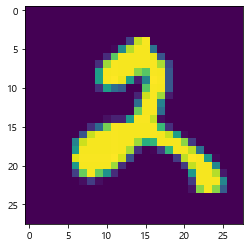

In [57]:
# 이미지로 그려보기
plt.imshow(mnist.test.images[r:r+1].reshape(28,28))

In [58]:
print('Prediction :',sess.run(tf.argmax(hypot,1),feed_dict={X:mnist.test.images[r:r+1]}))

Prediction : [2]
